#### 라이브러리

In [2]:
#library
import pandas as pd
from datetime import datetime

#visualization
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

import seaborn as sns

#### 데이터 불러오기

In [7]:
df1 = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\character_location_tel15.csv')

#### 시각화용 전처리

In [8]:
#float형을 정수형으로 변환
type_change_list = ['character.location.x','character.location.y','character.location.z','whitecircle_location_x','whitecircle_location_y']

for i in type_change_list:
    df1[i] = df1[i].astype(int)

In [9]:
# whitecircle_location_z 데이터 0으로 추가
df1['whitecircle_location_z'] = 0

In [10]:
df1

_D character.name  character.location.x  \
0      13:00:15.160    CES_HaiSaki                114352   
1      13:00:15.160    CES_HaiSaki                114260   
2      13:00:16.542    CES_HaiSaki                114590   
3      13:00:16.954    CES_HaiSaki                114652   
4      13:00:17.595    CES_HaiSaki                114849   
...             ...            ...                   ...   
35725  13:31:43.699      PeRo_Ming                301572   
35726  13:31:43.699      PeRo_Ming                301572   
35727  13:31:43.700      PeRo_Ming                301572   
35728  13:31:43.700      PeRo_Ming                301572   
35729  13:31:47.367      DNW_seoul                298623   

       character.location.y  character.location.z  character.isInBlueZone  \
0                    363168                  4518                   False   
1                    363199                  4585                   False   
2                    363165                  4371                   False   
3                    363143                  4399                   False   
4                    363305                  4371                   False   
...                     ...                   ...                     ...   
35725                351408                  5651                   False   
35726                351408                  5651                   False   
35727                351408                  5651                   False   
35728                351408                  5651                   False   
35729                352336                  5303                   False   

       phase  whitecircle_location_x  whitecircle_location_y  \
0        1.0                  302503                  396249   
1        1.0                  302503                  396249   
2        1.0                  302503                  396249   
3        1.0                  302503                  396249   
4        1.0                  302503                  396249   
...      ...                     ...                     ...   
35725    7.0                  301699                  356227   
35726    7.0                  301699                  356227   
35727    7.0                  301699                  356227   
35728    7.0                  301699                  356227   
35729    7.0                  301699                  356227   

       whitecircle_radius  whitecircle_location_z  
0           203699.687500                       0  
1           203699.687500                       0  
2           203699.687500                       0  
3           203699.687500                       0  
4           203699.687500                       0  
...                   ...                     ...  
35725        11076.323242                       0  
35726        11076.323242                       0  
35727        11076.323242                       0  
35728        11076.323242                       0  
35729        11076.323242                       0  

[35730 rows x 11 columns]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192600 entries, 0 to 192599
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   _D                      192600 non-null  object 
 1   character.name          192600 non-null  object 
 2   character.location.x    192600 non-null  int32  
 3   character.location.y    192600 non-null  int32  
 4   character.location.z    192600 non-null  int32  
 5   character.isInBlueZone  192600 non-null  bool   
 6   phase                   192600 non-null  float64
 7   whitecircle_location_x  192600 non-null  int32  
 8   whitecircle_location_y  192600 non-null  int32  
 9   whitecircle_radius      192600 non-null  float64
 10  whitecircle_location_z  192600 non-null  int64  
dtypes: bool(1), float64(2), int32(5), int64(1), object(2)
memory usage: 11.2+ MB


In [7]:
df1.drop_duplicates()

_D character.name  character.location.x  \
0       11:21:03.132    TL_Jiaoyang                605780   
1       11:21:03.133    TL_Jiaoyang                605888   
2       11:21:03.651    TL_Jiaoyang                605379   
3       11:21:05.326    TL_Jiaoyang                605124   
4       11:21:05.448    TL_Jiaoyang                605124   
...              ...            ...                   ...   
192595  12:11:08.258    SSG_PiXeL1K                654095   
192596  12:11:15.419       SSG_Roth                652577   
192597  12:11:16.244    SSG_PiXeL1K                654095   
192598  12:11:23.423       SSG_Roth                652577   
192599  12:11:24.248    SSG_PiXeL1K                654095   

        character.location.y  character.location.z  character.isInBlueZone  \
0                     366935                 10457                   False   
1                     366900                 10551                   False   
2                     367114                  9876                   False   
3                     367265                  9903                   False   
4                     367265                  9903                   False   
...                      ...                   ...                     ...   
192595                334217                  9387                   False   
192596                337140                  9578                   False   
192597                334217                  9387                   False   
192598                337140                  9578                   False   
192599                334217                  9387                   False   

        phase  whitecircle_location_x  whitecircle_location_y  \
0         1.0                  438487                  245424   
1         1.0                  438487                  245424   
2         1.0                  438487                  245424   
3         1.0                  438487                  245424   
4         1.0                  438487                  245424   
...       ...                     ...                     ...   
192595    7.0                  649773                  339633   
192596    7.0                  649773                  339633   
192597    7.0                  649773                  339633   
192598    7.0                  649773                  339633   
192599    7.0                  649773                  339633   

        whitecircle_radius  whitecircle_location_z  
0            203699.687500                       0  
1            203699.687500                       0  
2            203699.687500                       0  
3            203699.687500                       0  
4            203699.687500                       0  
...                    ...                     ...  
192595        11076.323242                       0  
192596        11076.323242                       0  
192597        11076.323242                       0  
192598        11076.323242                       0  
192599        11076.323242                       0  

[146337 rows x 11 columns]

In [8]:
phase_1_df = df1[df1['phase'] == 1.0]
phase_2_df = df1[df1['phase'] == 2.0]
phase_3_df = df1[df1['phase'] == 3.0]
phase_4_df = df1[df1['phase'] == 4.0]
phase_5_df = df1[df1['phase'] == 5.0]
phase_6_df = df1[df1['phase'] == 6.0]
phase_7_df = df1[df1['phase'] == 7.0]

#### 페이즈별 히트맵 시각화

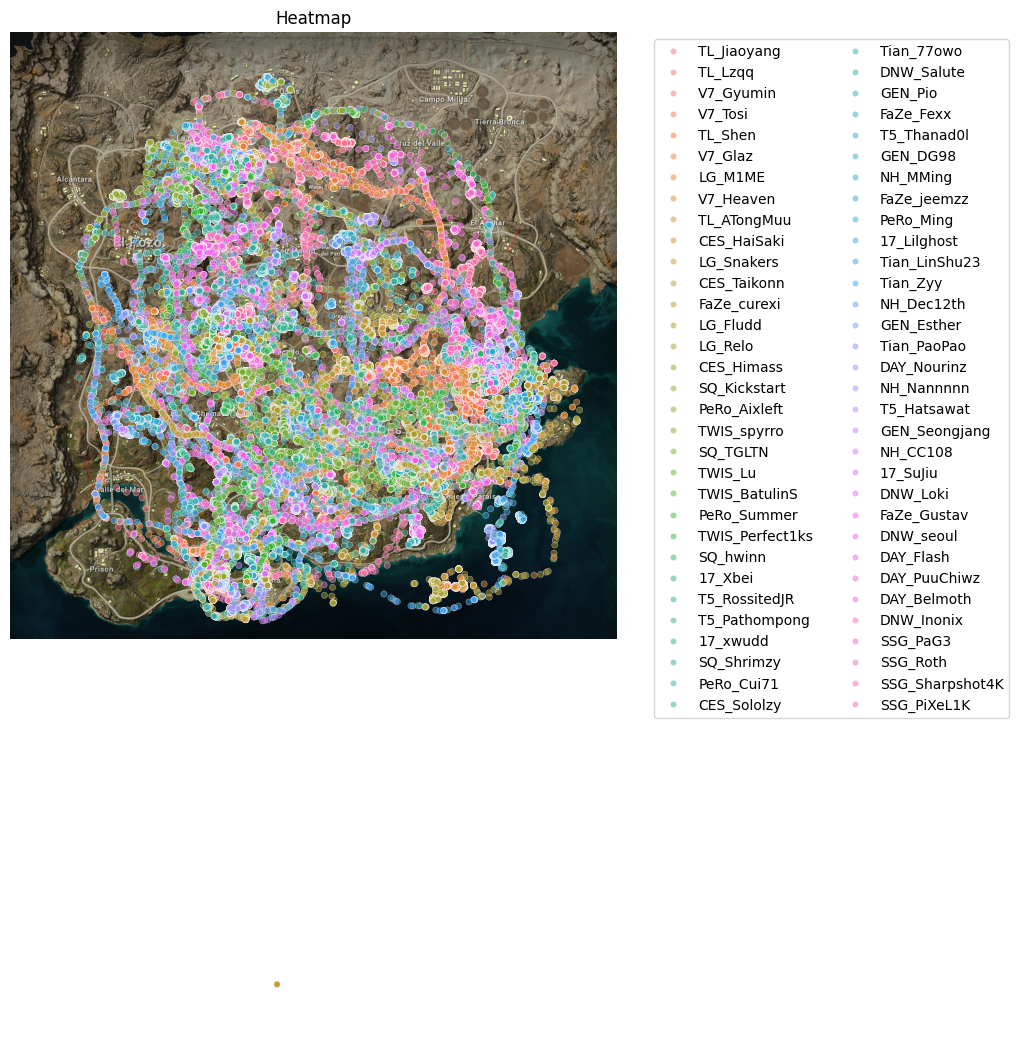

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

heatmap_df = df1


fig = plt.figure(figsize=(10, 10), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

sns.scatterplot(x='character.location.x', y='character.location.y', hue='character.name', data=heatmap_df, s=20, alpha=0.5, color = 'yellow')

plt.title('Heatmap')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조절

legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)


# 이미지 저장
output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\heatmap_match_1.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

#### 맵별 히트맵 시각화

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192600 entries, 0 to 192599
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   _D                      192600 non-null  object 
 1   character.name          192600 non-null  object 
 2   character.location.x    192600 non-null  int32  
 3   character.location.y    192600 non-null  int32  
 4   character.location.z    192600 non-null  int32  
 5   character.isInBlueZone  192600 non-null  bool   
 6   phase                   192600 non-null  float64
 7   whitecircle_location_x  192600 non-null  int32  
 8   whitecircle_location_y  192600 non-null  int32  
 9   whitecircle_radius      192600 non-null  float64
 10  whitecircle_location_z  192600 non-null  int64  
dtypes: bool(1), float64(2), int32(5), int64(1), object(2)
memory usage: 11.2+ MB


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

map_df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\all_charcter_location_tel_eragnel.csv')

fig = plt.figure(figsize=(10, 10), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\all_charcter_location_tel_eragnel.csv'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

sns.scatterplot(x='character.location.x', y='character.location.y', hue='character.name', data=map_df, s=20, alpha=0.5, palette='deep')

plt.title('Heatmap')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조절

legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
legend.get_texts()[0].set_text('Team A')  # 첫 번째 줄의 텍스트 수정
legend.get_texts()[1].set_text('Team B')  # 두 번째 줄의 텍스트 수정

# 이미지 저장
output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\heatmap_phase_1.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\PC\\Desktop\\AI_Lab\\pubg\\preprocessed\\all_charcter_location_tel_eragnel.csv'

In [ ]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236831 entries, 0 to 236830
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   _D                      236831 non-null  object 
 1   character.name          236831 non-null  object 
 2   character.location.x    236831 non-null  float64
 3   character.location.y    236831 non-null  float64
 4   character.location.z    236831 non-null  float64
 5   character.isInBlueZone  236831 non-null  bool   
 6   phase                   236831 non-null  float64
 7   whitecircle_location_x  236831 non-null  float64
 8   whitecircle_location_y  236831 non-null  float64
 9   whitecircle_radius      236831 non-null  float64
dtypes: bool(1), float64(7), object(2)
memory usage: 16.5+ MB


In [ ]:
map_df

#### 이동경로 시각화

In [ ]:
# 페이즈별 반지름 변화흐름 
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['whitecircle_radius'].to_list()

[203699.6875,
 112034.828125,
 67220.8984375,
 40332.5390625,
 26216.150390625,
 17040.498046875,
 11076.3232421875]

In [ ]:
# 페이즈 전처리 후 남은 것 체크
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['phase'].to_list()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [11]:
df = df1

NameError: name 'df_team_DNW' is not defined

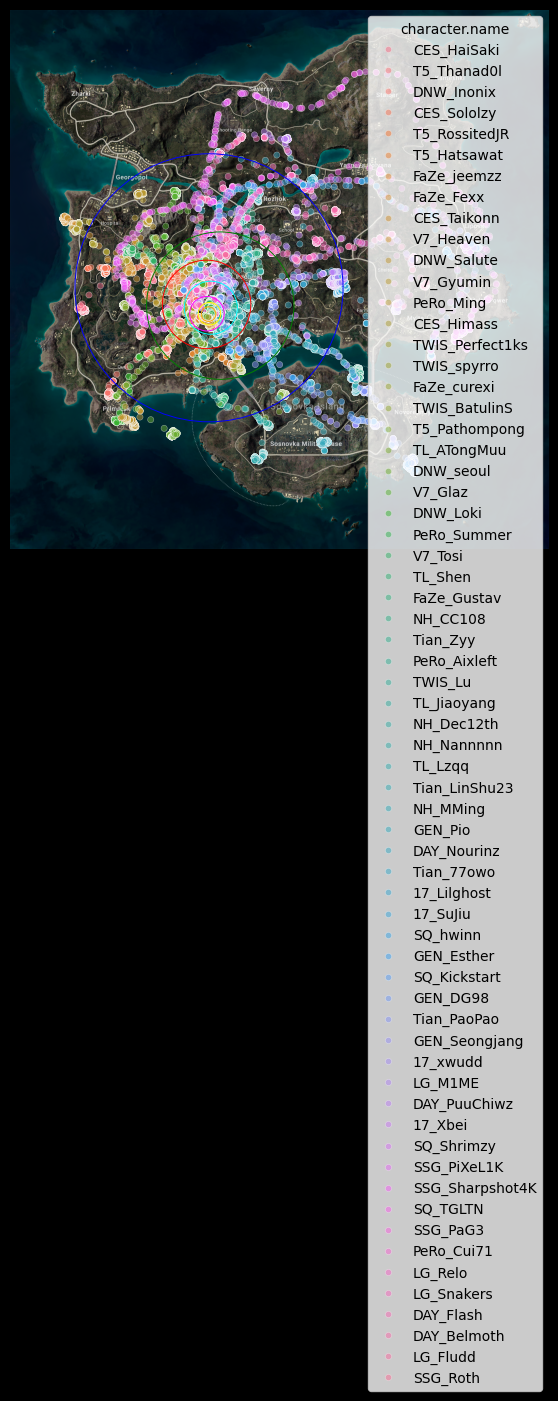

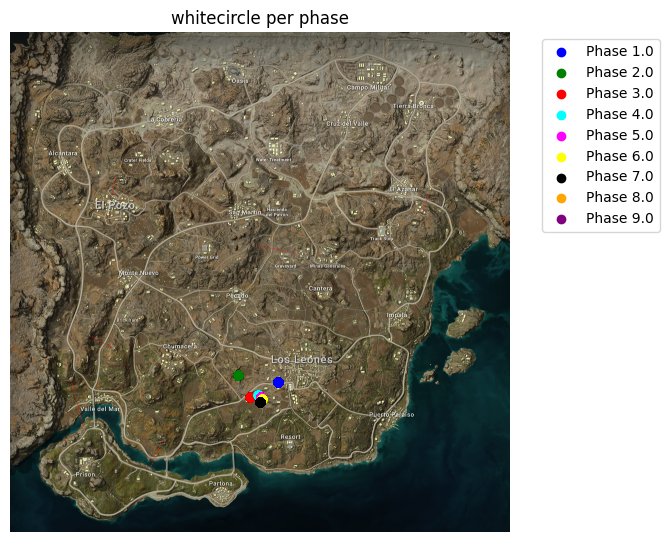

In [ ]:
# 중심부 좌표찍기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    plt.scatter(phase_data['whitecircle_location_x'], phase_data['whitecircle_location_y'], color=color, label=f'Phase {phase}')

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


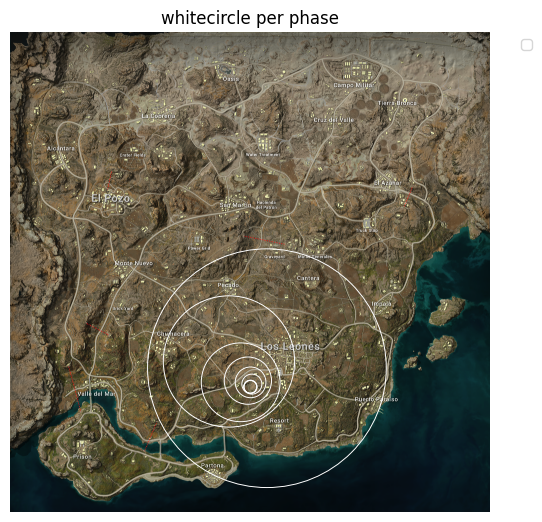

In [ ]:
# 안전구역 원 그리기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase in phase:
    phase_data = df[df['phase_rounded'] == phase]

    if not phase_data.empty:
      x = phase_data['whitecircle_location_x'].iloc[0]
      y = phase_data['whitecircle_location_y'].iloc[0]
      radius = phase_data['whitecircle_radius'].iloc[0]

    white_circle = plt.Circle((x,y),radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
    ax.add_patch(white_circle)

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

In [ ]:
# 안전구역 원과 중심부 좌표 같이 표시 - 성공

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시
        plt.scatter(x, y, color=color, label=f'Phase {phase}', s=8)
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

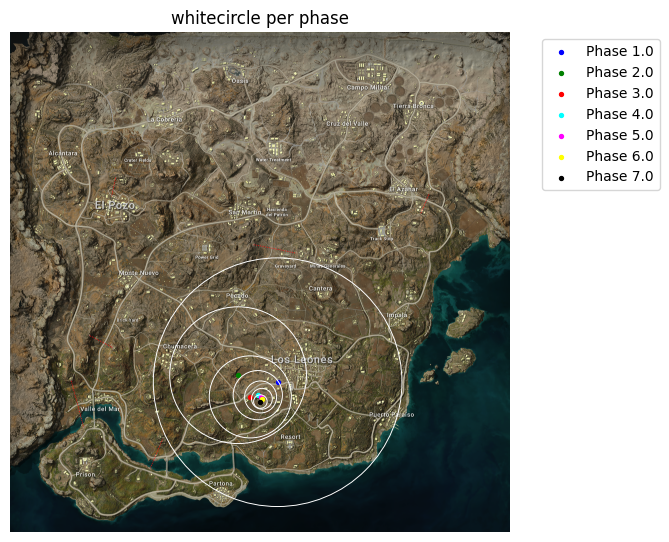

In [ ]:
# 안전구역 원과 중심부 좌표 같이 표시 - 성공

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시
        plt.scatter(x, y, color=color, label=f'Phase {phase}', s=8)
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
!pip install Pillow
!pip install ffmpeg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


애니메이션 GIF 파일이 성공적으로 생성되었습니다: C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif


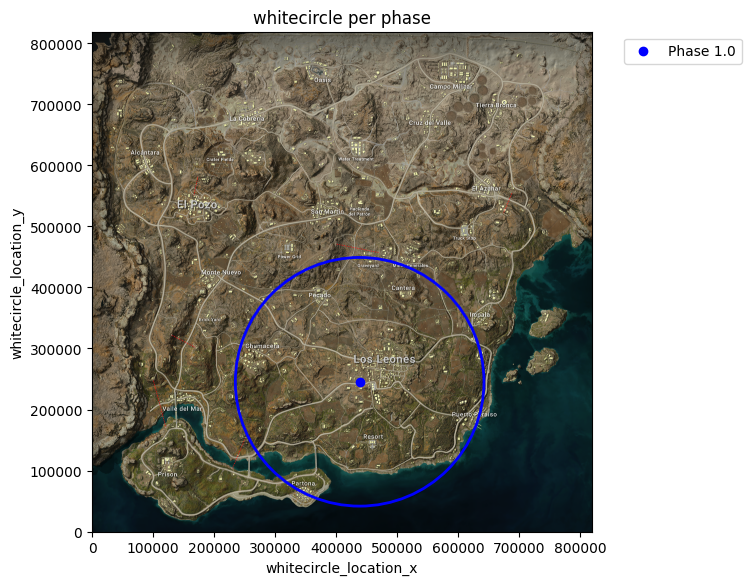

In [ ]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - gif만 성공

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
base_img = mpimg.imread(img_path)
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, 819200, 0, 819200])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor=colors[i], linewidth=2, fill=False)
        ax.add_patch(white_circle)
    ax.set_xlabel('whitecircle_location_x')
    ax.set_ylabel('whitecircle_location_y')
    ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# GIF 형식으로 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif'

ani.save(gif_path, writer=PillowWriter(fps=20))

# GIF 파일 생성 확인
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")

MovieWriter ffmpeg unavailable; using Pillow instead.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: unknown file extension: .mp4

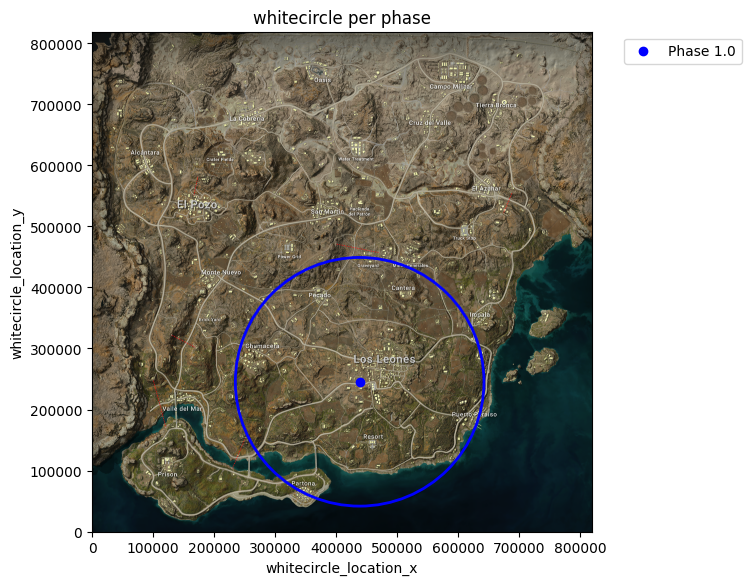

In [ ]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - mp4로도 같이 뽑기 > 오류발생하여 추후 시각화 중점할 때 다룰 예정

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import pandas as pd

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
base_img = mpimg.imread(img_path)
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, 819200, 0, 819200])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor=colors[i], linewidth=2, fill=False)
        ax.add_patch(white_circle)
    ax.set_xlabel('whitecircle_location_x')
    ax.set_ylabel('whitecircle_location_y')
    ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# MP4 형식으로 애니메이션 저장
mp4_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.mp4'
ani.save(mp4_path, writer='ffmpeg', fps=20)

# GIF 형식으로도 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=20))

# 파일 생성 확인
if os.path.exists(mp4_path):
    print(f"애니메이션 MP4 파일이 성공적으로 생성되었습니다: {mp4_path}")
else:
    print("애니메이션 MP4 파일 생성에 실패했습니다.")
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")